![title](images/project_image.png)

## Profitable app profiles from the apple store and google play markets

For this project, I've been hired as a data analysts for a company that builds Android and iOS mobile apps who make their apps available on Google Play and the App Store.

This company only build apps that are free to download and install, and is their main source of revenue. This means the revenue for any given app is mostly influenced by the number of users who use the app — the more users that see and engage with the ads, the better.

My goal for this project is to analyze data to help our developers understand what type of apps are likely to attract more users.

## Opening the data

As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play.

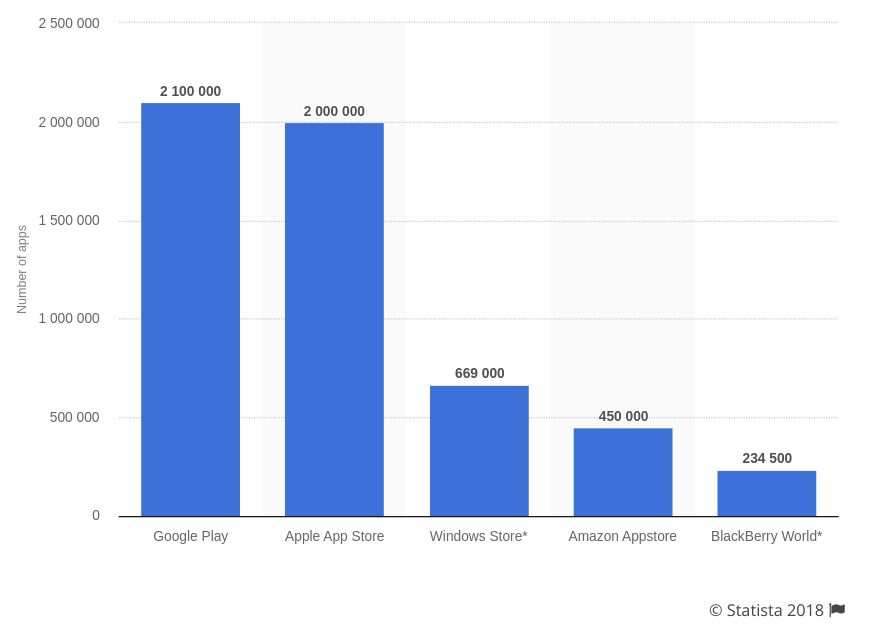

Collecting data for over four million apps requires a significant amount of time and money, so we'll try to analyze a sample of data instead. To avoid spending resources with collecting new data ourselves, we should first try to see whether we can find any relevant existing data at no cost. Luckily, these are two data sets that seem suitable for our purpose:

 - A data set containing data about approximately ten thousand Android apps from Google Play. You can download the data set directly from this [link](https://dq-content.s3.amazonaws.com/350/googleplaystore.csv).
 - A data set containing data about approximately seven thousand iOS apps from the App Store. You can download the data set directly from this [link](https://dq-content.s3.amazonaws.com/350/AppleStore.csv).

In [1]:
from csv import reader

# Google Play data set
opened_file = open('C:/Users/shane.mcdonald/Downloads/googleplaystore.csv', encoding='utf8')
read_file = reader(opened_file)
android = list(read_file)
android_header = android[0]      
android = android[1:]            

# Apple store data set
opened_file = open('C:/Users/shane.mcdonald/Downloads/AppleStore.csv', encoding='utf8')
read_file = reader(opened_file)
apple = list(read_file)
apple_header = apple[0]
apple = apple[1:]

## Exploring the data

Time to explore the data. First lets look at the Google store. The function `explore_data()` will explore the rows in a more readable way.

In [2]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]
    for row in dataset_slice:
        print(row)
        print('\n') 
        
    if rows_and_columns:
        print('Number of rows: ', len(dataset))
        print('Number of columns: ', len(dataset[0]))
        
print(android_header)
print('\n')
explore_data(android, 0, 3, True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows:  10841
Number of columns:  13


We see that the Google Play data has 10,841 rows and 13 columns. Some of the columns that may be of interest could be;

 - `'App'`
 - `'Category'`
 - `'Reviews'`
 - `'Installs'`
 - `'Type'`
 - `'Price'`
 - `'Genres'`

And now the same with the Apple data.

In [3]:
print(apple_header)
print('\n')
explore_data(apple, 0, 3, True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows:  7197
Number of columns:  16


The Apple store data has less rows (7197) but more columns (16). Columns that may be of interest could be;

 - `'id'`
 - `'rating_count_tot'`
 - `'user_rating'`
 - `'prime_genre'`
 - `'price'`

## Deleting wrong data

Recall that at our company, we only build apps that are free to download and install, and that are directed toward an English-speaking audience. This means that we'll need to:

 - Remove non-English apps like 爱奇艺PPS -《欢乐颂2》电视剧热播.
 - Remove apps that aren't free.
 
We can see from the [discusson](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) forum that there is an error in one of the rows. Due to a missing 'Rating' in the data set, the remaining colums have all shifted over by 1.

Let's confirm, then remove.

In [4]:
print(android[10472])

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


In [5]:
print(android_header)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [6]:
print(len(android))
del android[10472] # Removes the incorrect row.
print(len(android))

10841
10840


## Checking for duplicates

The [discusson](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) also mentions some of the apps have duplicate entries. For example we can see that Instagram has 4 duplicates, however, notice that 'Reviews' is unique. We can just keep the entry with the maximum number of reviews in order to get rid of the duplicates.

In [7]:
for app in android:
    name = app[0]
    if name == 'Instagram':
        print(app)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


In [8]:
unique_apps = []
duplicate_apps = []

for app in android:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)

print('# of unique apps: ', len(unique_apps))
print('# of duplicate apps: ', len(duplicate_apps))
print('\n')
print('Examples of duplicate apps: ', duplicate_apps[:15])

# of unique apps:  9659
# of duplicate apps:  1181


Examples of duplicate apps:  ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


In [9]:
reviews_max = {}

for app in android:
    name = app[0]
    n_reviews = float(app[3])
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
    elif name not in reviews_max:
        reviews_max[name] = n_reviews
        
print(len(reviews_max))

9659


In [10]:
android_clean = []
already_added = []

for app in android:
    name = app[0]
    n_reviews = float(app[3])
    if (n_reviews == reviews_max[name]) and (name not in already_added):
        android_clean.append(app)
        already_added.append(name)

In [11]:
explore_data(android_clean, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows:  9659
Number of columns:  13


After removing duplicates in the Android data set we are left with 9659 unique entries.

## Removing non-english speaking apps

The company is only interested in english based apps, so let's create a function to detect any foreign apps.

In [12]:
def string_test(my_string):
    
    for char in my_string:
        if ord(char) > 127: # 0 - 127 is the range for english text
            return False
        
    return True

In [13]:
print(string_test('Instagram'))
print(string_test('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(string_test('Docs To Go™ Free Office Suite'))
print(string_test('Instachat 😜'))

True
False
False
False


The function worked but is a bit too strict, we still need to keep the apps that are english but may be using things such as emoji's or trademark symbols. So let's adjust the function to detect any items with more than 3 characters greater than 127.

In [14]:
def string_test(my_string):
    
    non_eng_list = 0
    
    for char in my_string:
        if ord(char) > 127:
            non_eng_list += 1
            
    if non_eng_list > 3:
        return False
    else:
        return True

In [15]:
print(string_test('Instagram'))
print(string_test('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(string_test('Docs To Go™ Free Office Suite'))
print(string_test('Instachat 😜'))

True
False
True
True


That looks better. Now we can run the function over both data sets to build english based lists for Apple and Android.

In [16]:
english_android = []
english_apple = []

for app in android_clean:
    name = app[0]
    if string_test(name):
        english_android.append(app)

for app in apple:
    name = app[1]
    if string_test(name):
        english_apple.append(app)
        
explore_data(english_android, 0, 3, True)
print('\n')
explore_data(english_apple, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows:  9614
Number of columns:  13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+'

The new list now contains:

|Store|Rows|Columns|
|:---:|:---:|:---:|
|Apple|6183|16|
|Android|9614|13|

## Isolating free apps

We are only interested in apps that are free to download and install. Currently we have both free and paid apps in our data so let's isolate only the free apps for our analysis.

In [17]:
free_android_dict = {}
free_apple_dict = {}

for app in english_android:
    name = app[7]
    if name in free_android_dict:
        free_android_dict[name] += 1
    else:
        free_android_dict[name] = 1
        
for app in english_apple:
    name = app[4]
    if name in free_apple_dict:
        free_apple_dict[name] += 1
    else:
        free_apple_dict[name] = 1
        
print(free_android_dict)
print('\n')
print(free_apple_dict)

{'0': 8864, '$4.99': 70, '$3.99': 56, '$1.49': 45, '$2.99': 124, '$7.99': 7, '$5.99': 26, '$3.49': 7, '$1.99': 73, '$6.99': 10, '$9.99': 19, '$7.49': 2, '$0.99': 145, '$9.00': 1, '$5.49': 5, '$10.00': 2, '$11.99': 3, '$79.99': 1, '$16.99': 2, '$14.99': 9, '$1.00': 3, '$29.99': 5, '$2.49': 25, '$24.99': 3, '$10.99': 1, '$1.50': 1, '$19.99': 5, '$15.99': 1, '$33.99': 1, '$74.99': 1, '$39.99': 2, '$3.95': 1, '$4.49': 9, '$1.70': 2, '$8.99': 5, '$2.00': 3, '$3.88': 1, '$25.99': 1, '$399.99': 11, '$17.99': 2, '$400.00': 1, '$3.02': 1, '$1.76': 1, '$4.84': 1, '$4.77': 1, '$1.61': 1, '$2.50': 1, '$1.59': 1, '$6.49': 5, '$1.29': 1, '$5.00': 1, '$13.99': 2, '$299.99': 1, '$379.99': 1, '$37.99': 1, '$18.99': 1, '$389.99': 1, '$19.90': 1, '$8.49': 2, '$1.75': 1, '$14.00': 1, '$4.85': 1, '$46.99': 1, '$109.99': 1, '$154.99': 1, '$3.08': 1, '$2.59': 1, '$4.80': 1, '$1.96': 1, '$19.40': 1, '$3.90': 1, '$4.59': 1, '$15.46': 1, '$3.04': 1, '$12.99': 3, '$4.29': 1, '$2.60': 1, '$3.28': 1, '$4.60': 1, '

In [18]:
free_android_list = []
free_apple_list = []

for app in english_android:
    if app[7] == '0':
        free_android_list.append(app)
        
for app in english_apple:
    if app[4] == '0.0':
        free_apple_list.append(app)
        
print('Number of free android apps: ', len(free_android_list))
print('Number of free apple apps: ', len(free_apple_list))
print('Percentage of FREE android apps :', 1 - (len(english_android) - len(free_android_list)) / len(english_android))
print('Percentage of FREE apple apps :', 1 - (len(english_apple) - len(free_apple_list)) / len(english_apple))

Number of free android apps:  8864
Number of free apple apps:  3222
Percentage of FREE android apps : 0.921988766382359
Percentage of FREE apple apps : 0.5211062590975255


We now have our final list of apps and can now perform some more analysis.

|Store|Rows|Columns|% Free|
|:---:|:---:|:---:|:---:|
|Apple|3222|16|52%|
|Android|8864|13|92%|

Interesting to note the large number and percentage of free apps on the Google store. They may assist us with our decision on what type of app to build in our final decision.

## Most common apps by genre

We need to find the app profiles that will work best across both markets. Let's start by getting a sense of the most common genre's for each market.

Google has two potential categories:

 - `'Genres'`
 - `'Category'`
 
While the Apple store has a single category:

 - `'prime_genre'`
 
Let's build a frequency table function to see the most common genres in each store.

In [19]:
# Create the dictionary

def freq_table(dataset, index):
    table = {}
    running_total = 0
    for app in dataset:
        name = app[index]
        running_total += 1
        if name in table:
            table[name] += 1
        else:
            table[name] = 1
            
# Convert values to a percentage
            
    table_percentages = {}
    for value in table:
        percentage = (table[value] / running_total) * 100
        table_percentages[value] = percentage
        
    return table_percentages

# Display in a sorted table
        
def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

###  Creating the Android 'Genres' frequency table

In [20]:
display_table(free_android_list, 9)

Tools : 8.449909747292418
Entertainment : 6.069494584837545
Education : 5.347472924187725
Business : 4.591606498194946
Productivity : 3.892148014440433
Lifestyle : 3.892148014440433
Finance : 3.7003610108303246
Medical : 3.531137184115524
Sports : 3.463447653429603
Personalization : 3.3167870036101084
Communication : 3.2378158844765346
Action : 3.1024368231046933
Health & Fitness : 3.0798736462093865
Photography : 2.944494584837545
News & Magazines : 2.7978339350180503
Social : 2.6624548736462095
Travel & Local : 2.3240072202166067
Shopping : 2.2450361010830324
Books & Reference : 2.1435018050541514
Simulation : 2.0419675090252705
Dating : 1.861462093862816
Arcade : 1.8501805054151623
Video Players & Editors : 1.7712093862815883
Casual : 1.7599277978339352
Maps & Navigation : 1.3989169675090252
Food & Drink : 1.2409747292418771
Puzzle : 1.128158844765343
Racing : 0.9927797833935018
Role Playing : 0.9363718411552346
Libraries & Demo : 0.9363718411552346
Auto & Vehicles : 0.9250902527075

###  Creating the Android 'Category' frequency table

In [21]:
display_table(free_android_list, 1)

FAMILY : 18.907942238267147
GAME : 9.724729241877256
TOOLS : 8.461191335740072
BUSINESS : 4.591606498194946
LIFESTYLE : 3.9034296028880866
PRODUCTIVITY : 3.892148014440433
FINANCE : 3.7003610108303246
MEDICAL : 3.531137184115524
SPORTS : 3.395758122743682
PERSONALIZATION : 3.3167870036101084
COMMUNICATION : 3.2378158844765346
HEALTH_AND_FITNESS : 3.0798736462093865
PHOTOGRAPHY : 2.944494584837545
NEWS_AND_MAGAZINES : 2.7978339350180503
SOCIAL : 2.6624548736462095
TRAVEL_AND_LOCAL : 2.33528880866426
SHOPPING : 2.2450361010830324
BOOKS_AND_REFERENCE : 2.1435018050541514
DATING : 1.861462093862816
VIDEO_PLAYERS : 1.7937725631768955
MAPS_AND_NAVIGATION : 1.3989169675090252
FOOD_AND_DRINK : 1.2409747292418771
EDUCATION : 1.1620036101083033
ENTERTAINMENT : 0.9589350180505415
LIBRARIES_AND_DEMO : 0.9363718411552346
AUTO_AND_VEHICLES : 0.9250902527075812
HOUSE_AND_HOME : 0.8235559566787004
WEATHER : 0.8009927797833934
EVENTS : 0.7107400722021661
PARENTING : 0.6543321299638989
ART_AND_DESIGN : 

###  Creating the Apple 'prime_genre' frequency table

In [22]:
display_table(free_apple_list, -5)

Games : 58.16263190564867
Entertainment : 7.883302296710118
Photo & Video : 4.9658597144630665
Education : 3.662321539416512
Social Networking : 3.2898820608317814
Shopping : 2.60707635009311
Utilities : 2.5139664804469275
Sports : 2.1415270018621975
Music : 2.0484171322160147
Health & Fitness : 2.0173805090006205
Productivity : 1.7380509000620732
Lifestyle : 1.5828677839851024
News : 1.3345747982619491
Travel : 1.2414649286157666
Finance : 1.1173184357541899
Weather : 0.8690254500310366
Food & Drink : 0.8069522036002483
Reference : 0.5586592178770949
Business : 0.5276225946617008
Book : 0.4345127250155183
Navigation : 0.186219739292365
Medical : 0.186219739292365
Catalogs : 0.12414649286157665


At a glance there seems to be a difference in what people are using each of the stores for. For example, it appears that Apple is the preferred store for games and social media apps, while the Google store is used for more practical styled apps.

### Most popular apps by genre on the app store

One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the Google Play data set, we can find this information in the `Installs` column, but this information is missing for the App Store data set. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the rating_count_tot app.

Let's start with calculating the average number of user ratings per app genre on the App Store. To do that, we'll need to:

- Isolate the apps of each genre.
- Sum up the user ratings for the apps of that genre.
- Divide the sum by the number of apps belonging to that genre (not by the total number of apps).

In [23]:
genre_apple = freq_table(free_apple_list, -5)

for genre in genre_apple:
    rating_total = 0
    genre_count = 0
    for app in free_apple_list:
        user_rating = (app[-5])
        if user_rating == genre:
            ratings = float(app[5])
            rating_total += ratings
            genre_count += 1
    rating_average = rating_total / genre_count
    print(genre, ":", rating_average)

Social Networking : 71548.34905660378
Photo & Video : 28441.54375
Games : 22788.6696905016
Music : 57326.530303030304
Reference : 74942.11111111111
Health & Fitness : 23298.015384615384
Weather : 52279.892857142855
Utilities : 18684.456790123455
Travel : 28243.8
Shopping : 26919.690476190477
News : 21248.023255813954
Navigation : 86090.33333333333
Lifestyle : 16485.764705882353
Entertainment : 14029.830708661417
Food & Drink : 33333.92307692308
Sports : 23008.898550724636
Book : 39758.5
Finance : 31467.944444444445
Education : 7003.983050847458
Productivity : 21028.410714285714
Business : 7491.117647058823
Catalogs : 4004.0
Medical : 612.0


While app profiles like social networking, music and nagivagtion seems like tempting choices, they are dominated by a select few. A better selection would be the `Reference` profile where the appears to be no obvious monopoly in the genre.

### Most popular apps by 'Genre' on Google Play store

In [24]:
category_android = freq_table(free_android_list, 1)

for category in category_android:
    total = 0
    len_category = 0
    for app in free_android_list:
        category_app = app[1]
        if category_app == category:
            installs = app[5]
            installs = installs.replace('+', '')
            installs = installs.replace(',', '')
            installs = float(installs)
            total += installs
            len_category += 1
    category_average = total / len_category
    print(category, ":", category_average)

ART_AND_DESIGN : 1986335.0877192982
AUTO_AND_VEHICLES : 647317.8170731707
BEAUTY : 513151.88679245283
BOOKS_AND_REFERENCE : 8767811.894736841
BUSINESS : 1712290.1474201474
COMICS : 817657.2727272727
COMMUNICATION : 38456119.167247385
DATING : 854028.8303030303
EDUCATION : 1833495.145631068
ENTERTAINMENT : 11640705.88235294
EVENTS : 253542.22222222222
FINANCE : 1387692.475609756
FOOD_AND_DRINK : 1924897.7363636363
HEALTH_AND_FITNESS : 4188821.9853479853
HOUSE_AND_HOME : 1331540.5616438356
LIBRARIES_AND_DEMO : 638503.734939759
LIFESTYLE : 1437816.2687861272
GAME : 15588015.603248259
FAMILY : 3695641.8198090694
MEDICAL : 120550.61980830671
SOCIAL : 23253652.127118643
SHOPPING : 7036877.311557789
PHOTOGRAPHY : 17840110.40229885
SPORTS : 3638640.1428571427
TRAVEL_AND_LOCAL : 13984077.710144928
TOOLS : 10801391.298666667
PERSONALIZATION : 5201482.6122448975
PRODUCTIVITY : 16787331.344927534
PARENTING : 542603.6206896552
WEATHER : 5074486.197183099
VIDEO_PLAYERS : 24727872.452830188
NEWS_AND_

In the case of the Google Play store, `COMMUNICATION` may seem like an obvious genre choice when deciding on which app to build based on user ratings. But once again this is dominated by a select few such as Facebook, Instagram and Twitter. Let's explore our initial assumption of reference based apps in the Google Play store.

In [25]:
for app in free_android_list:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000,000+' or app[5] == '500,000,000+' or app[5] == '100,000,000+'):
        print(app[0], ":", app[5])

Google Play Books : 1,000,000,000+
Bible : 100,000,000+
Amazon Kindle : 100,000,000+
Wattpad 📖 Free Books : 100,000,000+
Audiobooks from Audible : 100,000,000+


`BOOKS_AND_REFERENCE` still looks like a worthwhile candidate in the case for buiding an app. The downloads and user ratings are still high and there is less influence by the dominant players (above). So let's now see what on offer in the 1 million to 100 million download range for `BOOKS_AND_REFERENCE` in the Google Play store

In [26]:
for app in free_android_list:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000+' or app[5] == '5,000,000+' or app[5] == '10,000,000+' or app[5] == '50,000,000+'):
        print(app[0], ":", app[5]) 

Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
AlReader -any text book reader : 5,000,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
ReadEra – free ebook reader : 1,000,000+
Ebook Reader : 5,000,000+
Read books online : 5,000,000+
eBoox: book reader fb2 epub zip : 1,000,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
Moon+ Reader : 10,000,000+
English-Myanmar Dictionary : 1,000,000+
Golden Dictionary (EN-AR) : 1,000,000+
All Language Translator Free : 1,000,000+
Aldiko Book Reader : 10,000,000+
Dictionary - WordWeb : 5,000,000+
50000 Free eBooks & Free AudioBooks : 5,000,000+
Al-Quran (Free) : 10,000,000+
Al Quran Indonesia : 10,000,000+
Al'Quran Bahasa Indonesia : 10,000,000+
Al Quran Al karim : 1,000,000+
Al Quran : EAlim - Translations & MP3 Offline : 5,000,000+
Koran Read &MP3 30 Juz Offline : 1,000,000+
H

Notice there are a few dictionaries in this particular genre but not all languages are covered. The looks to be dictionaries for; Hindi, Spanish and English but no others. This could be a potential gap in the market which still sees over 10 million downloads.

### Conclusion

The goal of this project was to provide some recommendations on developing a free app that would suit both the Apple and Google app stores.

Looking at the final list indicates a few possibilites, but one of the more promising app ideas could be developing an app based around a dictionary or thesaurus in different languages. Identifying and developing a point of difference such as voice activation or image recognition for the app will also be of benefit. There could even be the possibiity to sell the app to a travel app developer or other relevant user for a dictionary/translator.